In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [2]:
def build_simon_oracle(s):
    n = len(s)
    qc = QuantumCircuit(2 * n, name='Oracle')

    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(i, n + i)

    return qc

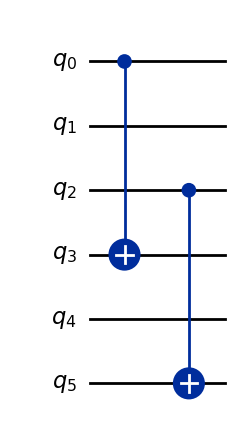

In [3]:
secret_string = '101'

oracle_circuit = build_simon_oracle(secret_string)
oracle_circuit.draw('mpl')

In [4]:
import numpy as np

def build_simon_circuit(s):
    n = len(s)
    circuit = QuantumCircuit(2 * n, n)

    for i in range(n):
        circuit.h(i)

    oracle = build_simon_oracle(s)
    circuit.compose(oracle, inplace=True)

    for i in range(n):
        circuit.h(i)

    for i in range(n):
        circuit.measure(i, i)

    return circuit

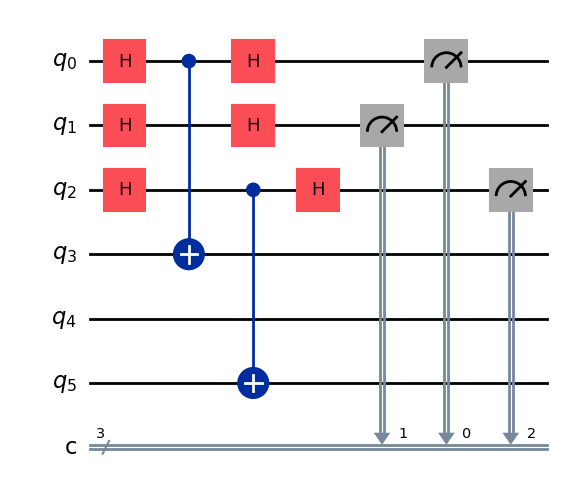

In [5]:
simon_circuit = build_simon_circuit(secret_string)
simon_circuit.draw('mpl')

### Ideal Simulation

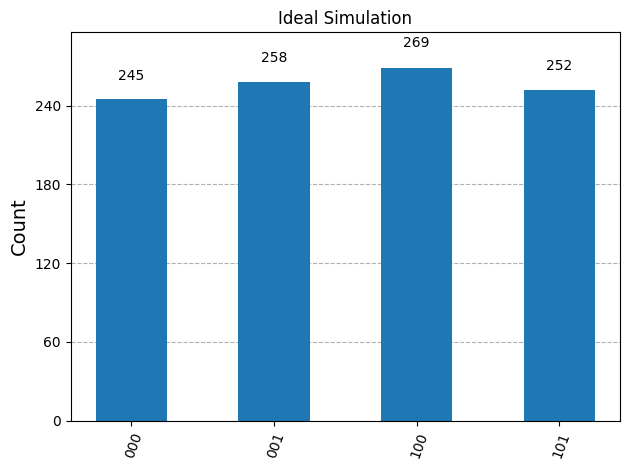

In [6]:
backend = Aer.get_backend('qasm_simulator')

transpiled_circuit = transpile(simon_circuit, backend)

job = backend.run(transpiled_circuit, shots=1024)
result = job.result()

counts = result.get_counts()
plot_histogram(counts, title="Ideal Simulation")

### Noisy Simulation

In [7]:
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_aer.noise.errors import ReadoutError

In [8]:
noise_model = NoiseModel()

error_1q = depolarizing_error(0.05, 1)
error_2q = depolarizing_error(0.1, 2)
noise_model.add_all_qubit_quantum_error(error_1q, ['h', 'x'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])

readout_error = ReadoutError([[0.9, 0.1], [0.2, 0.8]])
noise_model.add_all_qubit_readout_error(readout_error)

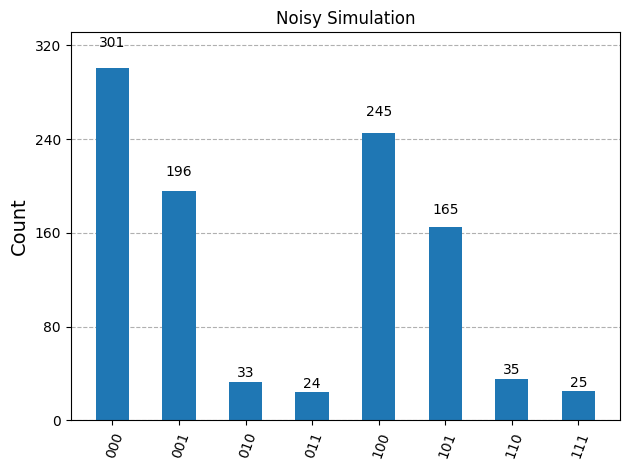

In [9]:
noisy_transpiled = transpile(simon_circuit, backend)

noisy_job = backend.run(noisy_transpiled, noise_model=noise_model, shots=1024)
noisy_result = noisy_job.result()
noisy_counts = noisy_result.get_counts()

plot_histogram(noisy_counts, title="Noisy Simulation")